In [1]:
from src.eda_vector import *
from src.lda_model import *
from src.model import *
from src.classifier import *
from src.helpers import *
from imblearn.over_sampling import SMOTE

In [2]:
'''
NOTE: No EDA appears in this notebook. See Untitled-Copy2 for EDA
--> EDA methods also availible in EDA_vec class
'''
print()

In [2]:
# train, test, split
X_train, X_test, y_train, y_test = get_data_wrapper(sample=False, samp_size=0.5)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
len(X_train)

4028988

In [4]:
# vectorizing process
custom_stops = ['https', 'rt', 'co', 'amp', 'via', 'go', 'get', 'said', 'say', 'news', 'new', 'make', 'want', 
                'trump', 'clinton', 'donald', 'donald trump', 'donaldtrump', 'says', 'hillary', 'hillaryclinton',
                'hillary clinton', 'realdonaldtrump', 'would', 'let', 'video', 'like']

# custom_stops = ['https', 'rt', 'co', 'amp', 'via', 'go', 'get', 'said', 'say', 'news', 'new', 'make', 'want', 
#                 'says', 'would', 'let', 'video', 'like']

# fit vectorizer, add stop words, return vocab
vectors = EDA_vec(X_train, y_train)
vectors.add_stop_words(custom_stops)
vocab, fit_mat = vectors.vectorize(min_df=0.0001)

# transform training and testing data 
matrix = fit_mat.transform(X_train)
matrix_test = fit_mat.transform(X_test)

In [ ]:
# # fit LDA model on training data
# lda = LDA_model(topics=25)
# lda.fit(matrix, y_train, vocab)
# lda.phi() # to evaluate coherence score
# theta = lda.theta()

# # get test theta for random forest evaluation
# theta_test = lda.test_theta(matrix_test)

In [5]:
# random forest parameters
estimators = 150
depth = 150
leafs = None
th_hold = 0.457  #0.542

In [ ]:
# balance data from LDA theata matrix
# y_smote = y_train
# theta, y_train = SMOTE().fit_resample(theta, y_train)

In [ ]:
# # random forest (with LDA)
# forest = RandForest(n_estimators=estimators, max_depth=depth, max_leaf=leafs, 
#                     max_features=theta.shape[1], class_weight=None)
# forest.fit(theta, y_train)
# probas, y_hat = forest.predict(theta_test, thresh=th_hold)
# forest.score(y_test, y_hat)
# print('Random Forest Scores -- with LDA')
# print(f'accuracy = {forest.acc}')
# print(f'oob = {forest.oob}')
# print(f'recall = {forest.recall}')
# print(f'precision = {forest.precision}')
# print(f'f_one = {forest.f_one}')
# forest.plot_confusion()

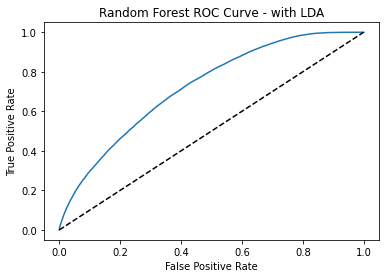

In [11]:
thresh = plot_roc_curve(theta_test, y_test, lda=True) # with LDA

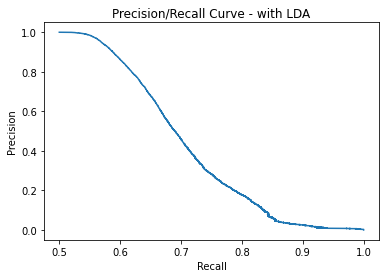

In [13]:
pr_thresh = plot_prec_roc_curve(theta_test, y_test, lda=True)

In [6]:
# balance data from count vectorized data
bal_matrix, bal_y_train = SMOTE().fit_resample(matrix, y_train)
bal_matrix_test, bal_y_test = SMOTE().fit_resample(matrix_test, y_test) 

### ALL data points below:

Random Forest Scores -- w/out LDA
accuracy = 0.7485554685196382
oob = 0.8612691321148178
recall = 0.8849030762747577
precision = 0.20448730277364585
f_one = 0.33220679521989244


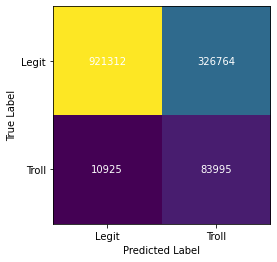

In [7]:
# random forest (without LDA) -- all unbalanced
forest = RandForest(n_estimators=estimators, max_depth=depth, max_leaf=leafs, 
                    max_features='log2', class_weight='balanced')
forest.fit(bal_matrix, bal_y_train)
probas, y_hat = forest.predict(matrix_test, thresh=0.458)
forest.score(y_test, y_hat)
print('Random Forest Scores -- w/out LDA')
print(f'accuracy = {forest.acc}')
print(f'oob = {forest.oob}')
print(f'recall = {forest.recall}')
print(f'precision = {forest.precision}')
print(f'f_one = {forest.f_one}')
forest.plot_confusion()

Random Forest Scores -- w/out LDA
accuracy = 0.805785720880777
oob = 0.8612691321148178
recall = 0.8203855878634639
precision = 0.24209780165458836
f_one = 0.3738666397804936


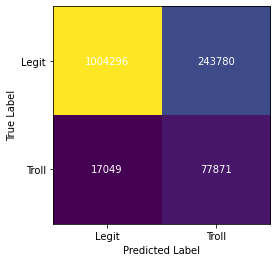

In [8]:
probas, y_hat = forest.predict(matrix_test, thresh=0.542)
forest.score(y_test, y_hat)
print('Random Forest Scores -- w/out LDA')
print(f'accuracy = {forest.acc}')
print(f'oob = {forest.oob}')
print(f'recall = {forest.recall}')
print(f'precision = {forest.precision}')
print(f'f_one = {forest.f_one}')
forest.plot_confusion()

Random Forest Scores -- w/out LDA
accuracy = 0.669133042838549
oob = 0.8612691321148178
recall = 0.9359039190897598
precision = 0.1685356807467203
f_one = 0.2856348217515373


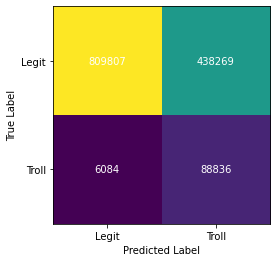

In [9]:
probas, y_hat = forest.predict(matrix_test, thresh=0.365)
forest.score(y_test, y_hat)
print('Random Forest Scores -- w/out LDA')
print(f'accuracy = {forest.acc}')
print(f'oob = {forest.oob}')
print(f'recall = {forest.recall}')
print(f'precision = {forest.precision}')
print(f'f_one = {forest.f_one}')
forest.plot_confusion()

Random Forest Scores -- w/out LDA
accuracy = 0.5213775767016432
oob = 0.8612691321148178
recall = 0.9753371260008428
precision = 0.1262970208423712
f_one = 0.22363535786150304


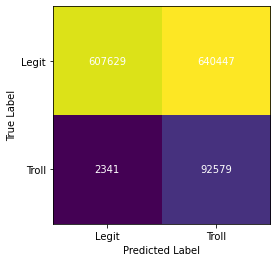

In [10]:
probas, y_hat = forest.predict(matrix_test, thresh=0.25)
forest.score(y_test, y_hat)
print('Random Forest Scores -- w/out LDA')
print(f'accuracy = {forest.acc}')
print(f'oob = {forest.oob}')
print(f'recall = {forest.recall}')
print(f'precision = {forest.precision}')
print(f'f_one = {forest.f_one}')
forest.plot_confusion()

Random Forest Scores -- w/out LDA
accuracy = 0.945652853768738
oob = 0.8612691321148178
recall = 0.23814791403286978
precision = 0.9710885814932554
f_one = 0.3824937816206704


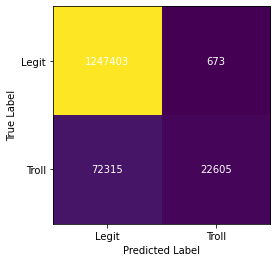

In [11]:
probas, y_hat = forest.predict(matrix_test, thresh=0.75)
forest.score(y_test, y_hat)
print('Random Forest Scores -- w/out LDA')
print(f'accuracy = {forest.acc}')
print(f'oob = {forest.oob}')
print(f'recall = {forest.recall}')
print(f'precision = {forest.precision}')
print(f'f_one = {forest.f_one}')
forest.plot_confusion()

Random Forest Scores -- w/out LDA
accuracy = 0.7767275554059729
oob = 0.8612691321148178
recall = 0.8559313105773283
precision = 0.2211205582651106
f_one = 0.3514482722821103


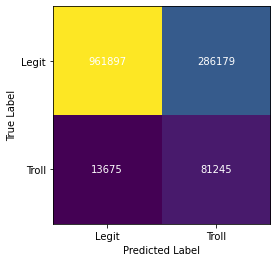

In [12]:
probas, y_hat = forest.predict(matrix_test, thresh=0.5)
forest.score(y_test, y_hat)
print('Random Forest Scores -- w/out LDA')
print(f'accuracy = {forest.acc}')
print(f'oob = {forest.oob}')
print(f'recall = {forest.recall}')
print(f'precision = {forest.precision}')
print(f'f_one = {forest.f_one}')
forest.plot_confusion()

In [13]:
def get_misses(y_hat, y_test, X_test):
    df = pd.DataFrame({'text': X_test, 'predicted': y_hat, 'actual': y_test})
    df = df[df['predicted'] != df['actual']]
    false_pos = df[df['predicted'] == 1]
    false_neg = df[df['predicted'] == 0]
    return false_pos, false_neg

Random Forest Scores -- w/out LDA
accuracy = 0.805785720880777
oob = 0.8612691321148178
recall = 0.8203855878634639
precision = 0.24209780165458836
f_one = 0.3738666397804936


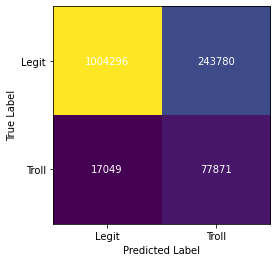

In [14]:
probas, y_hat = forest.predict(matrix_test, thresh=0.542)
forest.score(y_test, y_hat)
print('Random Forest Scores -- w/out LDA')
print(f'accuracy = {forest.acc}')
print(f'oob = {forest.oob}')
print(f'recall = {forest.recall}')
print(f'precision = {forest.precision}')
print(f'f_one = {forest.f_one}')
forest.plot_confusion()

In [15]:
false_pos_all, false_neg_all = get_misses(y_hat, y_test, X_test)

In [16]:
false_pos_all.to_csv('false_positives_all.csv')

In [17]:
false_neg_all.to_csv('false_negative_all.csv')

In [19]:
len(false_pos_all)

243780

10019

Random Forest Scores -- w/out LDA
accuracy = 0.8430070216457308
oob = 0.7718107312520787
recall = 0.7307530941892175
precision = 0.2733872233558311
f_one = 0.397909646467531


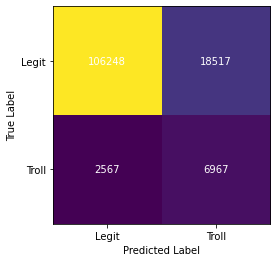

In [10]:
# random forest (without LDA) -- all unbalanced
forest = RandForest(n_estimators=estimators, max_depth=depth, max_leaf=leafs, 
                    max_features='log2', class_weight='balanced')
forest.fit(matrix, y_train)
probas, y_hat = forest.predict(matrix_test, thresh=0.542)
forest.score(y_test, y_hat)
print('Random Forest Scores -- w/out LDA')
print(f'accuracy = {forest.acc}')
print(f'oob = {forest.oob}')
print(f'recall = {forest.recall}')
print(f'precision = {forest.precision}')
print(f'f_one = {forest.f_one}')
forest.plot_confusion()

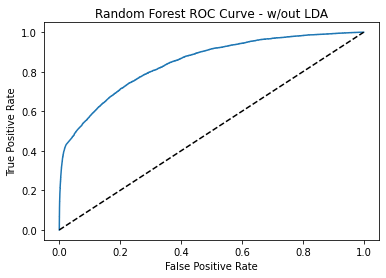

In [11]:
thresh_nolda = plot_roc_curve(matrix_test, y_test, lda=False) # wihtout LDA

In [9]:
roc_frame = pd.DataFrame({'fpr': thresh_nolda[0], 'tpr': thresh_nolda[1], 'thresh': thresh_nolda[2]})

In [23]:
roc_frame[(roc_frame['thresh'] >= 0.457) & (roc_frame['thresh'] < 0.459)]

,fpr,tpr,thresh
9638,0.294045,0.799189,0.458994
9639,0.294067,0.799189,0.458991
9640,0.294109,0.799189,0.458972
9641,0.294142,0.799329,0.458967
9642,0.294163,0.799329,0.458961
9643,0.294163,0.799608,0.458945
9644,0.294195,0.799608,0.458941
9645,0.294206,0.799608,0.458940
9646,0.294238,0.799608,0.458932
9647,0.294259,0.799608,0.458925


Random Forest Scores -- w/out LDA
accuracy = 0.7758062234268311
oob = 0.7734587910587791
recall = 0.8055380742605412
precision = 0.2137192152497565
f_one = 0.3378125756009589


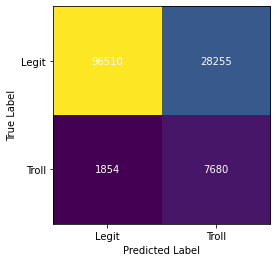

In [27]:
# pr_thr# random forest (without LDA) -- all unbalanced
forest = RandForest(n_estimators=estimators, max_depth=depth, max_leaf=leafs, 
                    max_features='log2', class_weight='balanced')
forest.fit(matrix, y_train)
probas, y_hat = forest.predict(matrix_test, thresh=0.5)
forest.score(y_test, y_hat)
print('Random Forest Scores -- w/out LDA')
print(f'accuracy = {forest.acc}')
print(f'oob = {forest.oob}')
print(f'recall = {forest.recall}')
print(f'precision = {forest.precision}')
print(f'f_one = {forest.f_one}')
forest.plot_confusion()

Random Forest Scores -- w/out LDA
accuracy = 0.7784421328528135
oob = 0.8814970758984032
recall = 0.7338997272917978
precision = 0.2045009498757855
f_one = 0.3198701684609934


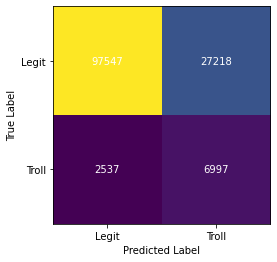

In [28]:
# random forest (without LDA) --> BALANCED FIT, UNBALANCED SCORE
forest = RandForest(n_estimators=500, max_depth=depth, max_leaf=leafs, 
                    max_features='log2', class_weight='balanced')
forest.fit(bal_matrix, bal_y_train)
probas, y_hat = forest.predict(matrix_test, thresh=0.457)
forest.score(y_test, y_hat)
print('Random Forest Scores -- w/out LDA')
print(f'accuracy = {forest.acc}')
print(f'oob = {forest.oob}')
print(f'recall = {forest.recall}')
print(f'precision = {forest.precision}')
print(f'f_one = {forest.f_one}')
forest.plot_confusion()

Random Forest Scores -- w/out LDA
accuracy = 0.7138325676289473
oob = 0.8817214930150172
recall = 0.8263058527375708
precision = 0.1764231647780714
f_one = 0.29076548313279693


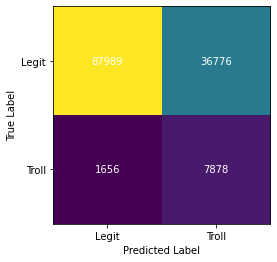

In [29]:
# random forest (without LDA) --> BALANCED FIT, UNBALANCED SCORE
forest = RandForest(n_estimators=500, max_depth=depth, max_leaf=leafs, 
                    max_features='log2', class_weight='balanced')
forest.fit(bal_matrix, bal_y_train)
probas, y_hat = forest.predict(matrix_test, thresh=0.365)
forest.score(y_test, y_hat)
print('Random Forest Scores -- w/out LDA')
print(f'accuracy = {forest.acc}')
print(f'oob = {forest.oob}')
print(f'recall = {forest.recall}')
print(f'precision = {forest.precision}')
print(f'f_one = {forest.f_one}')
forest.plot_confusion()

Random Forest Scores -- w/out LDA
accuracy = 0.821070894049844
oob = 0.8817214930150172
recall = 0.6463184392699811
precision = 0.2297539149888143
f_one = 0.33899983495626346


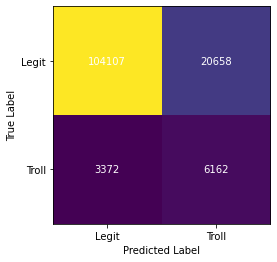

In [30]:
probas, y_hat = forest.predict(matrix_test, thresh=0.542)
forest.score(y_test, y_hat)
print('Random Forest Scores -- w/out LDA')
print(f'accuracy = {forest.acc}')
print(f'oob = {forest.oob}')
print(f'recall = {forest.recall}')
print(f'precision = {forest.precision}')
print(f'f_one = {forest.f_one}')
forest.plot_confusion()

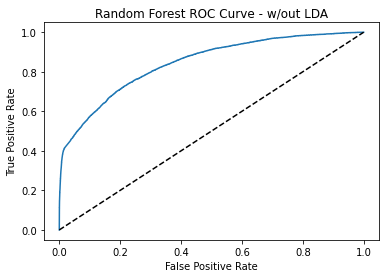

In [32]:
thresh_nolda = plot_roc_curve(matrix_test, y_test, lda=False) # wihtout LDA

In [36]:
roc_frame[(roc_frame['thresh'] >= 0.542) & (roc_frame['thresh'] < 0.543)]

,fpr,tpr,thresh
1587,0.012503,0.385680,0.542984
1588,0.012514,0.385680,0.542951
1589,0.012514,0.385820,0.542950
1590,0.012546,0.385820,0.542937
1591,0.012546,0.385960,0.542927
1592,0.012557,0.385960,0.542922
1593,0.012557,0.386240,0.542911
1594,0.012578,0.386240,0.542905
1595,0.012578,0.386380,0.542890
1596,0.012589,0.386380,0.542879


Random Forest Scores -- w/out LDA
accuracy = 0.7790750489579222
oob = 0.8817214930150172
recall = 0.7319068596601637
precision = 0.2046814501935938
f_one = 0.31990097648191446


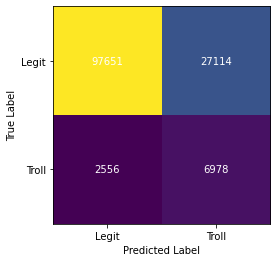

In [31]:
probas, y_hat = forest.predict(matrix_test, thresh=0.458)
forest.score(y_test, y_hat)
print('Random Forest Scores -- w/out LDA')
print(f'accuracy = {forest.acc}')
print(f'oob = {forest.oob}')
print(f'recall = {forest.recall}')
print(f'precision = {forest.precision}')
print(f'f_one = {forest.f_one}')
forest.plot_confusion()

Random Forest Scores -- w/out LDA
accuracy = 0.2557427828948838
oob = 0.8817214930150172
recall = 0.9924480805538074
precision = 0.08653503196363736
f_one = 0.15918975075077602


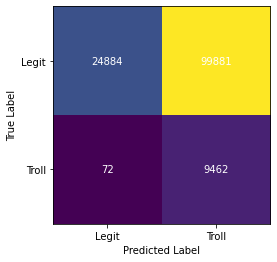

In [37]:
probas, y_hat = forest.predict(matrix_test, thresh=0.08)
forest.score(y_test, y_hat)
print('Random Forest Scores -- w/out LDA')
print(f'accuracy = {forest.acc}')
print(f'oob = {forest.oob}')
print(f'recall = {forest.recall}')
print(f'precision = {forest.precision}')
print(f'f_one = {forest.f_one}')
forest.plot_confusion()

Random Forest Scores -- w/out LDA
accuracy = 0.7801472833006947
oob = 0.8817214930150172
recall = 0.7305433186490455
precision = 0.20532397853900125
f_one = 0.3205541237113402


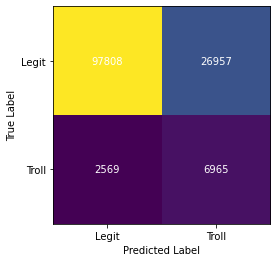

In [46]:
probas, y_hat = forest.predict(matrix_test, thresh=0.43)
forest.score(y_test, y_hat)
print('Random Forest Scores -- w/out LDA')
print(f'accuracy = {forest.acc}')
print(f'oob = {forest.oob}')
print(f'recall = {forest.recall}')
print(f'precision = {forest.precision}')
print(f'f_one = {forest.f_one}')
forest.plot_confusion()

In [ ]:
probas, y_hat = forest.predict(matrix_test, thresh=0.542)
forest.score(y_test, y_hat)
print('Random Forest Scores -- w/out LDA')
print(f'accuracy = {forest.acc}')
print(f'oob = {forest.oob}')
print(f'recall = {forest.recall}')
print(f'precision = {forest.precision}')
print(f'f_one = {forest.f_one}')
forest.plot_confusion()

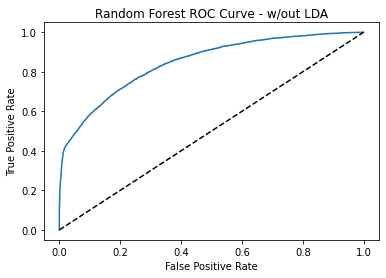

In [8]:
thresh_nolda = plot_roc_curve(matrix_test, y_test, lda=False) # wihtout LDA

Random Forest Scores -- w/out LDA
accuracy = 0.4579626666666667
oob = 0.814544
recall = 0.5530333333333334
precision = 0.08036484116911928
f_one = 0.14033648274870372


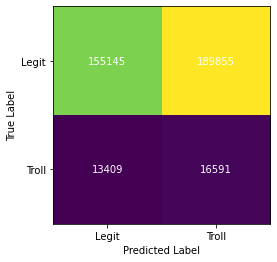

In [28]:
# # random forest (without LDA) --> BALANCED FIT, BALANCED SCORE
# forest = RandForest(n_estimators=estimators, max_depth=depth, max_leaf=leafs, 
#                     max_features='log2', class_weight='balanced')
# forest.fit(matrix, y_train)
# probas, y_hat = forest.predict(UBmatrix, thresh=th_hold)
# forest.score(UBy_train, y_hat)
# print('Random Forest Scores -- w/out LDA')
# print(f'accuracy = {forest.acc}')
# print(f'oob = {forest.oob}')
# print(f'recall = {forest.recall}')
# print(f'precision = {forest.precision}')
# print(f'f_one = {forest.f_one}')
# forest.plot_confusion()

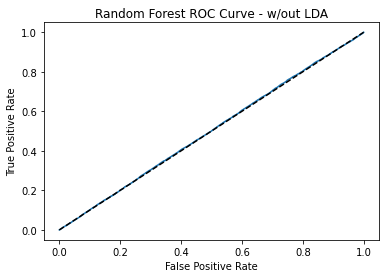

In [26]:
thresh_nolda = plot_roc_curve(UBmatrix_test, UBy_test, lda=False) # wihtout LDA, UNBALANCED

Random Forest Scores -- w/out LDA
accuracy = 0.839
oob = 0.816728
recall = 0.842016
precision = 0.8369674125673935
f_one = 0.8394841159064262


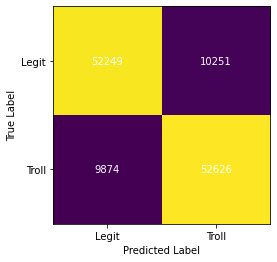

In [20]:
# random forest (without LDA)
forest = RandForest(n_estimators=estimators, max_depth=depth, max_leaf=leafs, 
                    max_features='log2', class_weight='balanced')
forest.fit(matrix, y_train)
probas, y_hat = forest.predict(matrix_test, thresh=.55)
forest.score(y_test, y_hat)
print('Random Forest Scores -- w/out LDA')
print(f'accuracy = {forest.acc}')
print(f'oob = {forest.oob}')
print(f'recall = {forest.recall}')
print(f'precision = {forest.precision}')
print(f'f_one = {forest.f_one}')
forest.plot_confusion()

In [14]:
roc_nums = pd.DataFrame({'fpr': thresh_nolda[0], 'tpr': thresh_nolda[1], 'thresholds': thresh_nolda[2]})

In [ ]:
roc_nums[(roc_nums['thresholds'] > .50) & (roc_nums['thresholds'] < .52)]

In [11]:
lda.display_topics()

Topic 0:
going watch back tax white rally got show campaign much
Topic 1:
election campaign gop win day right president polls voters poll
Topic 2:
time america vote people know khan every way never take
Topic 3:
obama debate man women bill presidential debatenight vote still speech
Topic 4:
us president cnn think even taxes family know lies people


In [16]:
lda.coherance_score()

-5.237078828221568

In [31]:
lda.coherance_score()

-4.748669717009582

In [ ]:
'''TOPIC COHERANCE SCORES: --> only 10k data samples'''
# topics 2 --> -7.487219089117191
# topics 4 --> -10.222697013007569
# topics 6 --> -12.070494413320219
# topics 8 --> -13.165411752758045
# topics 10 --> -13.466351137344793
# topics 12 --> -14.279565234962526
# topics 14 --> -14.610241988703596
# topics 18 --> -15.333867297657738
# topics 20 --> -15.802765426002347
# topics 22 --> -15.90626134524627
# topics 24 --> -16.21720655745143
# topics 26 --> -15.494214848919107

In [17]:
# test for best num_topics:

def test_topics(X, y, vocab, low, high, by):
    scores = []
    
    for n_topic in range(low, high, by):
        lda = LDA_model(topics=n_topic)
        lda.fit(X, y, vocab)
        lda.phi()
        score = lda.coherance_score()
        scores.append((n_topic, score))
        
    return scores

def print_topic_score(scores):
    for score in scores:
        print(f'#{score[0]} --> {score[1]}')
        
def plot_topic_scores(scores):
    fig, ax = plt.subplots()
    x = [n_topics[0] for n_topics in scores]
    y = [score[1] for score in scores]
    
    ax.plot(x, y)
    ax.set_title('Coherence Score by Topic')
    ax.set_xlabel('# of Topics')
    ax.set_ylabel('Coherence Score');

In [ ]:
topic_scores = test_topics(matrix, y_train, vocab, 2, 30, 2)

In [ ]:
print_topic_scores(topic_scores)

In [ ]:
plot_topic_scores(topic_scores)

In [89]:
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score, precision_score, plot_confusion_matrix

# Random Forest, X = theta, y = y_train
def eval_random_forest(X, y, folds=15, n_estimators=500, max_depth=15, max_leaf=None):
    
    kf = KFold(n_splits=folds, shuffle=True)
    accur = []
    oob_  = []
    rec   = []
    prec  = []
    f_1   = []
    iters = 0
    
    for train, test in kf.split(X):
        
        # random forest 
        forest = RandForest(n_estimators=n_estimators, max_depth=max_depth, 
                            max_leaf=max_leaf, max_features=theta.shape[1])
        forest.fit(X[train], y.iloc[train])
        probas, y_hat = forest.predict(X[test])
        forest.score(y.iloc[test], y_hat)
        
        accur.append(forest.acc)
        oob_.append(forest.oob)
        rec.append(forest.recall)
        prec.append(forest.precision)
        f_1.append(forest.f_one)
        
        iters += 1
        if iters % 5 == 0:
            print(iters)
        
    
    return np.mean(accur), np.mean(oob_), np.mean(rec), np.mean(prec), np.mean(f_1), forest

In [90]:
accuracy, mean, rec, prec, model = eval_random_forest(theta, y_train)

5
10
15


In [29]:
'''
Evaluate best number of estimators, leafs, and max_depth
'''
# Parameter testing
def test_forest_depth(X, y, depth_lst, th_hold=.5, max_features='log2', lda=False):
    accur = []
    oob_  = []
    rec   = []
    prec  = []
    f_1   = []

    for depth in depth_lst:
        forest = RandForest(n_estimators=500, max_depth=depth, max_leaf=100, 
                            max_features=max_features, class_weight=None)
        forest.fit(X, y)
        probas, y_hat = forest.predict(matrix_test, thresh=th_hold)
        forest.score(y_test, y_hat)
        accur.append(forest.acc)
        oob_.append(forest.oob)
        rec.append(forest.recall)
        prec.append(forest.precision)
        f_1.append(forest.f_one)
        
        if lda:
            print('Random Forest Scores -- w/ LDA')
        else:
            print('Random Forest Scores -- w/out LDA')

        print(f'Depth = {depth}')
        print(f'accuracy = {forest.acc}')
        print(f'oob = {forest.oob}')
        print(f'recall = {forest.recall}')
        print(f'precision = {forest.precision}')
        print(f'f_1 score = {forest.f_one}')
        print('-----------------')
    
    return [accur, oob_, rec, prec, f_1]

def test_forest_estimators(X, y, est_lst, th_hold=.5, max_features='log2', lda=False):
    accur = []
    oob_  = []
    rec   = []
    prec  = []
    f_1   = []

    for est in est_lst:
        forest = RandForest(n_estimators=est, max_depth=100, max_leaf=100, 
                            max_features=max_features, class_weight=None)
        forest.fit(X, y)
        probas, y_hat = forest.predict(matrix_test, thresh=th_hold)
        forest.score(y_test, y_hat)
        accur.append(forest.acc)
        oob_.append(forest.oob)
        rec.append(forest.recall)
        prec.append(forest.precision)
        f_1.append(forest.f_one)
        
        if lda:
            print('Random Forest Scores -- w/ LDA')
        else:
            print('Random Forest Scores -- w/out LDA')

        print(f'Estimators = {est}')
        print(f'accuracy = {forest.acc}')
        print(f'oob = {forest.oob}')
        print(f'recall = {forest.recall}')
        print(f'precision = {forest.precision}')
        print(f'f_1 score = {forest.f_one}')
        print('-----------------')
    
    return [accur, oob_, rec, prec, f_1]


In [38]:
depth_lst = [150, 200, 250, 300]
depth_score = test_forest_depth(matrix, y_train, depth_lst, th_hold=.542, max_features='log2', lda=False)

Random Forest Scores -- w/out LDA
Depth = 150
accuracy = 0.745068
oob = 0.7532626666666666
recall = 0.537896
precision = 0.9184504214077889
f_1 score = 0.6784523250944718
-----------------
Random Forest Scores -- w/out LDA
Depth = 200
accuracy = 0.739188
oob = 0.753304
recall = 0.521584
precision = 0.9234974999645887
f_1 score = 0.6666496249980828
-----------------
Random Forest Scores -- w/out LDA
Depth = 250
accuracy = 0.740968
oob = 0.7533693333333333
recall = 0.527256
precision = 0.9208489353378416
f_1 score = 0.6705634576643672
-----------------
Random Forest Scores -- w/out LDA
Depth = 300
accuracy = 0.741976
oob = 0.7542906666666667
recall = 0.529264
precision = 0.9211383698588176
f_1 score = 0.6722622471065226
-----------------


In [41]:
est_lst = [100, 150, 200, 250]
scores = test_forest_estimators(matrix, y_train, est_lst, th_hold=.542, max_features='log2', lda=False)

Random Forest Scores -- w/out LDA
Estimators = 100
accuracy = 0.739008
oob = 0.7530293333333333
recall = 0.524608
precision = 0.9184313725490196
f_1 score = 0.6677800407331975
-----------------
Random Forest Scores -- w/out LDA
Estimators = 150
accuracy = 0.77486
oob = 0.751732
recall = 0.726184
precision = 0.8045040813251677
f_1 score = 0.7633403551261189
-----------------
Random Forest Scores -- w/out LDA
Estimators = 200
accuracy = 0.741012
oob = 0.7527346666666667
recall = 0.527216
precision = 0.9210493214630124
f_1 score = 0.6705842249594254
-----------------
Random Forest Scores -- w/out LDA
Estimators = 250
accuracy = 0.740424
oob = 0.754044
recall = 0.52552
precision = 0.9216544602519853
f_1 score = 0.669370369992969
-----------------


In [34]:
def plot_eval_scores(scores, metric_lst, metric):
    fig, ax = plt.subplots(figsize=(8,5))
    x = metric_lst
    
    ax.plot(x, [score for score in scores[0]], label='Accuracy')
    ax.plot(x, [score for score in scores[1]], label='OOB')
    ax.plot(x, [score for score in scores[2]], label='Recall')
    ax.plot(x, [score for score in scores[3]], label='Precision')
    ax.plot(x, [score for score in scores[4]], label='F_One')
    
    ax.set_title(f'Evaluation Scores {metric}')
    ax.set_xlabel(f'Number of {metric}')
    ax.set_ylabel(f'Score')
    ax.legend();

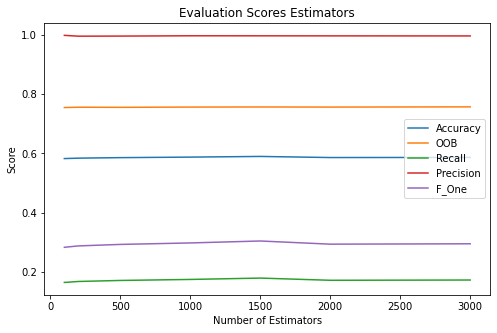

In [40]:
plot_eval_scores(scores, est_lst, 'Estimators') # .5 threshold, class_weight = balanced

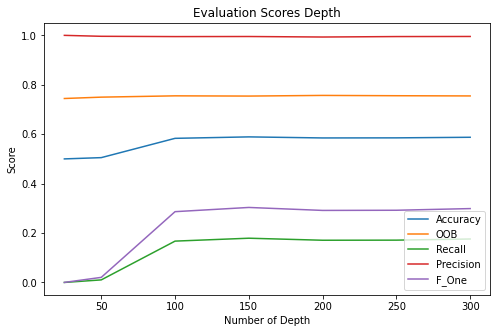

In [41]:
plot_eval_scores(depth_score, depth_lst, 'Depth') # .5 threshold, class_weight = balanced

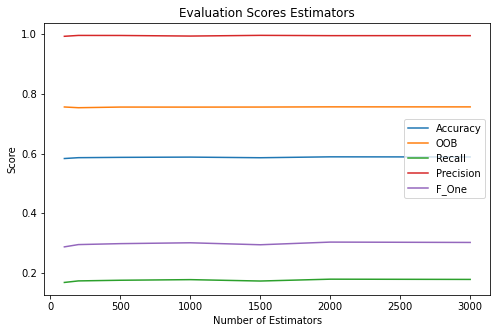

In [51]:
plot_eval_scores(scores, est_lst, 'Estimators') # .75 threshold, class_weight = None

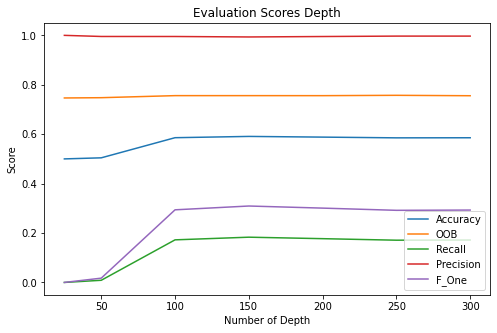

In [52]:
plot_eval_scores(depth_score, depth_lst, 'Depth') # .75 threshold, class_weight = None

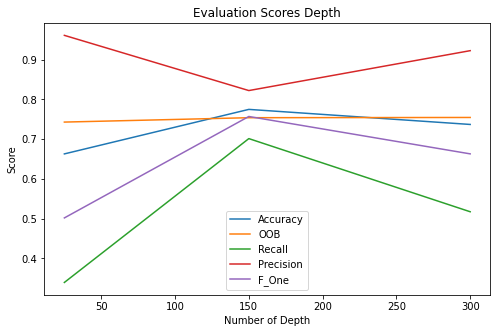

In [35]:
plot_eval_scores(depth_score, depth_lst, 'Depth') #.521

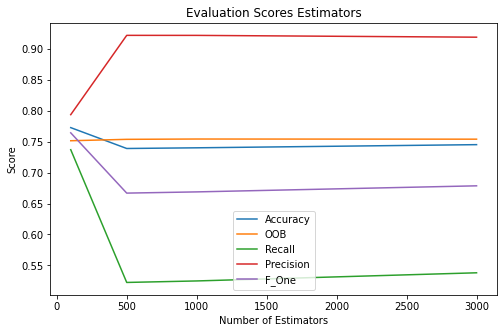

In [37]:
plot_eval_scores(scores, est_lst, 'Estimators')

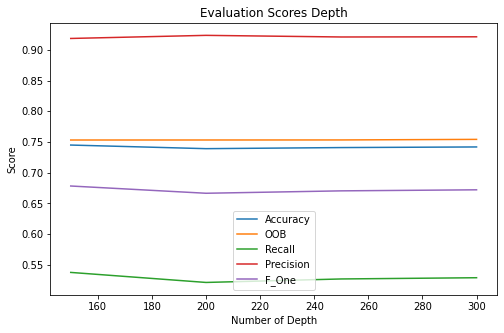

In [40]:
plot_eval_scores(depth_score, depth_lst, 'Depth')

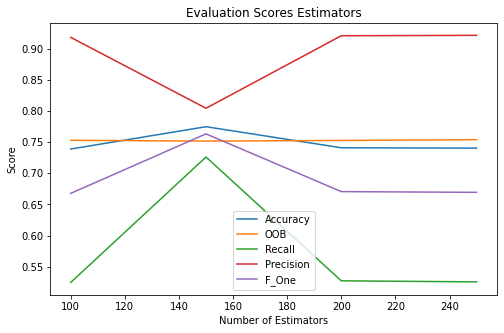

In [42]:
plot_eval_scores(scores, est_lst, 'Estimators')

In [28]:
lst = [score for score in scores[0]]

In [29]:
lst

[0.58246, 0.58386, 0.5856, 0.58738, 0.58964, 0.58594, 0.58636]

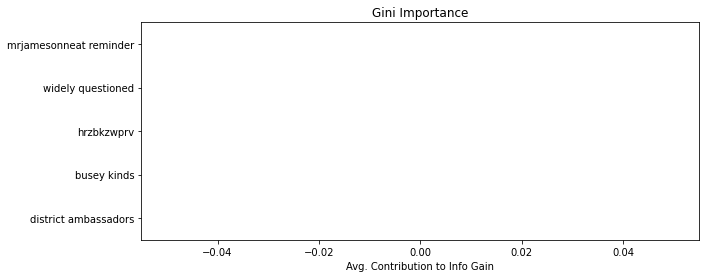

In [20]:
forest.chart_gini_import(features=5, vocab=vocab)

In [15]:
feature_scores = pd.Series(forest.forest.feature_importances_, index=vocab)
feature_scores = feature_scores.sort_values()

In [2]:
def chart_gini_import(features, vocab=None):
    fig, ax = plt.subplots()

    feature_scores = pd.Series(forest.forest.feature_importances_, index=vocab)
    feature_scores = feature_scores.sort_values(ascending=False)
    ax = feature_scores[:features:-1].plot(kind='barh', figsize=(10,4))
    ax.set_title('Gini Importance')
    ax.set_xlabel('Avg. Contribution to Info Gain');

In [3]:
chart_gini_import(15, vocab)

NameError: name 'vocab' is not defined

In [16]:
feature_scores.head()

ｙｏｕ                0.0
hear baby          0.0
headache           0.0
password           0.0
harambe gorilla    0.0
dtype: float64

In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords, words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

# generate stop words
custom_stops = ['https', 'rt', 'co', 'amp', 'via', 'go', 'get', 'said', 'say', 'news', 'new', 'make', 'want', 
                'trump', 'clinton', 'donald', 'donald trump', 'donaldtrump', 'says', 'hillary', 'hillaryclinton',
                'hillary clinton', 'realdonaldtrump', 'would', 'let', 'video', 'like']

# clean tweets hydrated from GWU
def clean_hydrated(filepath):  
    df = pd.read_csv(filepath)
    df = df[df['lang'] == 'en']
    df = df.loc[:, ['created_at', 'user_screen_name', 'text', 'user_location', 'retweet_count', 'favorite_count']]
    df.rename(columns={'created_at': 'date', 'user_screen_name': 'user', 'text': 'text', 'user_location': 'location', 
                       'retweet_count': 'retweets', 'favorite_count': 'favs'}, inplace=True)
    df.drop_duplicates(ignore_index=True, inplace=True)
    df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
    df['legit'] = 1
    
    return df

# get random samples
def get_random_sample(df, num_samples, replace=False):
    samp_idx = np.random.RandomState.choice(range(len(df)), size=num_samples, replace=replace)
    df_samp = df.iloc[samp_idx, :]
    return df_samp

# load and split data
def get_data():
    # load data
    legit = pd.read_csv('data/legit_tweets.csv', parse_dates = ['date'])
    troll = pd.read_csv('data/troll_tweets.csv', parse_dates = ['date'])
    troll['legit'] = 1
    legit['legit'] = 0

    # limit troll timeframe
    troll_summer = troll[(troll['date'] >= '2016-06-28') & (troll['date'] <= '2016-11-02')]

    # combine legit and troll tweets
    total_tweets = pd.concat([legit.loc[:,['text','legit']], troll_summer.loc[:,['text','legit']]])
    total_tweets.reset_index(drop=True, inplace=True)

    # set X and y
    X = total_tweets['text']
    y = total_tweets['legit']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=45)

    return X_train, X_test, y_train, y_test

# def get_samples(X_train, X_test, y_train, y_test, samp_size=0.12)
#     # get samples
#     if num_samples > 0:

#     train = pd.DataFrame({'text': X_train, 'legit': y_train})
#     test = pd.DataFrame({'text': X_test, 'legit': y_test})

#         if balanced:
#             troll_samp = get_random_sample(troll_summer, int((num_samples/2)), replace=True)
#             legit_samp = get_random_sample(legit, int((num_samples/2)))
#         else:
#             troll_samp = get_random_sample(troll_summer, int(0.08 * num_samples))
#             legit_samp = get_random_sample(legit, int((1 - 0.08) * num_samples))
#     else:
#         troll_samp = troll_summer
#         legit_samp = legit

    

#     return X, y

In [28]:
a, b, c, d = get_data()

/home/ubuntu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
/home/ubuntu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [33]:
len(a) * .1 , len(b) * .1

(402898.80000000005, 134299.6)

In [41]:
# get random samples
def get_random_sample(df, num_samples, replace=False):
    rand = np.random.RandomState(55)
    samp_idx = rand.choice(range(len(df)), size=num_samples, replace=replace)
    df_samp = df.iloc[samp_idx, :]
    return df_samp

def get_samples(X_train, X_test, y_train, y_test, samp_size=0.1):

    train = pd.DataFrame({'text': X_train, 'legit': y_train})
    test = pd.DataFrame({'text': X_test, 'legit': y_test})

    train = get_random_sample(train, int(len(train)*samp_size))
    test = get_random_sample(test, int(len(test)*samp_size))

    train_Xout = train['text']
    train_yout = train['legit']

    test_Xout = test['text']
    test_yout = test['legit']

    return train_Xout, test_Xout, train_yout, test_yout

In [42]:
e, f, g, h = get_samples(a, b, c, d)

In [44]:
len(g), len(h)

(402898, 134299)